In [18]:
import pylab 

import librosa
import numpy as np
import pandas as pd
from librosa import display

In [21]:
temp = pd.read_csv('C:/Users/apt/Downloads/Atraining_normal_seg.csv')
temp.head()

,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


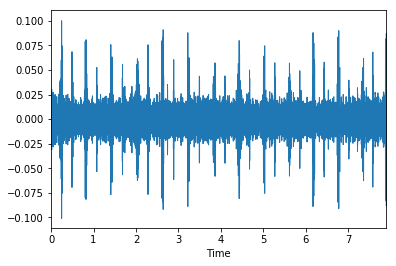

In [22]:
data, sampling_rate = librosa.load('C:/Users/apt/Desktop/Data/peterbently/Atraining_normal/201102081321.wav', sr=44100 )
display.waveplot(data, sr=sampling_rate)

In [43]:
# create training data
data_x = []
data_y = []
print(temp.shape)
for j in range(temp.shape[0]):
   for i in range(1, temp.shape[1] - 1):
     try:
       print(j,i)
       #loading all the audio files from csv file
       data, sampling_rate = librosa.load('C:/Users/apt/Desktop/Data/peterbently/Atraining_normal/'+ temp.iloc[j, 0].split('.')[0] +'.wav', sr=44100 )
       print(int(temp.iloc[j, i]), int(temp.iloc[j, i+1])) 
       temp_data = data[int(temp.iloc[j, i]):int(temp.iloc[j, i+1])]
       #print(temp_data)
       temp_label = temp.iloc[:, i].name.split('.')[0]
       #print(temp_label)
       data_x.append(temp_data)
       #data_y.append(temp_label)
     except:
       pass

(21, 40)
0 1
10021 20759
0 2
20759 35075
0 3
35075 47244
0 4
47244 62992
0 5
62992 73729
0 6
73729 88761
0 7
88761 101646
0 8
101646 115246
0 9
115246 127415
0 10
127415 143163
0 11
143163 153900
0 12
153900 168216
0 13
168216 180385
0 14
180385 195417
0 15
195417 206155
0 16
206155 220471
0 17
220471 231924
0 18
231924 272010
0 19
272010 283463
0 20
283463 297779
0 21
297779 309232
0 22
309232 324264
0 23
324264 335001
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
1 1
1 2
11526 27941
1 3
27941 42197
1 4
42197 58163
1 5
58163 71278
1 6
71278 88955
1 7
88955 102641
1 8
102641 122028
1 9
122028 134573
1 10
134573 152821
1 11
152821 184753
1 12
184753 197869
1 13
197869 216686
1 14
216686 230942
1 15
230942 251211
1 16
251211 265168
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
2 1
5366 17632
2 2
17632 31432
2 3
31432 44464
2 4
44464 59030
2 5
59030 71296
2 6
71296 86629
2 7
86629 99661
2 8
99661 

254308 276323
19 15
276323 290746
19 16
290746 312761
19 17
312761 326425
19 18
19 19
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
20 1
7591 20496
20 2
20496 37197
20 3
37197 50862
20 4
50862 66803
20 5
66803 78949
20 6
78949 95650
20 7
95650 107796
20 8
107796 124497
20 9
124497 138161
20 10
138161 154862
20 11
154862 167008
20 12
167008 183709
20 13
183709 196614
20 14
196614 213315
20 15
213315 226220
20 16
226220 241403
20 17
241403 255826
20 18
255826 272527
20 19
272527 284673
20 20
284673 300863
20 21
300863 314279
20 22
314279 330980
20 23
330980 343126
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38


In [30]:
# preprocessing 
from keras.preprocessing.sequence import pad_sequences

# step 1
data_x = pad_sequences(data_x, maxlen=20000, dtype='float', padding='post', truncating='post', value=0.)

# step 2
data_x = data_x / np.max(data_x)

# step 3
data_x = data_x[:,:,np.newaxis]
data_y = pd.Series(data_y)
data_y.value_counts()

data_y = data_y.map({'S1':0, 'S2':1}).values

Using TensorFlow backend.


In [34]:
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPool1D
from keras.models import Sequential

model = Sequential()

model.add(InputLayer(input_shape=data_x.shape[1:]))

model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Flatten())
model.add(Dense(units=1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# train model
model.fit(data_x, data_y, batch_size=32, epochs=10)

Epoch 1/10
369/369 [==============================] - 16s 43ms/step - loss: 8.3384 - acc: 0.4770
Epoch 2/10
369/369 [==============================] - 16s 42ms/step - loss: 8.3384 - acc: 0.4770
Epoch 3/10
369/369 [==============================] - 16s 42ms/step - loss: 8.3384 - acc: 0.4770
Epoch 4/10
369/369 [==============================] - 16s 42ms/step - loss: 8.3384 - acc: 0.4770
Epoch 5/10
369/369 [==============================] - 15s 42ms/step - loss: 8.3384 - acc: 0.4770
Epoch 6/10
369/369 [==============================] - 16s 42ms/step - loss: 8.3384 - acc: 0.4770
Epoch 7/10
369/369 [==============================] - 16s 43ms/step - loss: 8.3384 - acc: 0.4770
Epoch 8/10
369/369 [==============================] - 16s 44ms/step - loss: 8.3384 - acc: 0.4770
Epoch 9/10
369/369 [==============================] - 17s 46ms/step - loss: 8.3384 - acc: 0.4770
Epoch 10/10
369/369 [==============================] - 13s 36ms/step - loss: 8.3384 - acc: 0.4770
